## Mapping clusters

In [1]:
#import packages
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import geopandas as gpd
from geopandas.tools import sjoin
import contextily as cx
import os
import os, zipfile


from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import shapely.wkt
%config InlineBackend.figure_format='retina'

import tarfile
import urllib

from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

ModuleNotFoundError: No module named 'contextily'

#  Mapping

In [4]:
#Read and concat all postcode postcode unit shape files

#path = r'C:\Users\medshesa\Documents\Whytehawk Project\Download_Postcodes_1602738\codepoint-poly_3738609'
#os.chdir(path)

file = os.listdir(r'C:\Users\medshesa\Documents\Whytehawk Project\Download_Postcodes_1602738\codepoint-poly_3738609\both')
path = [os.path.join(r'C:\Users\medshesa\Documents\Whytehawk Project\Download_Postcodes_1602738\codepoint-poly_3738609\both', i) for i in file if ".shp" in i]

gdf = gpd.GeoDataFrame(pd.concat([gpd.read_file(i) for i in path], 
                        ignore_index=True), crs=gpd.read_file(path[0]).crs)



FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\medshesa\\Documents\\Whytehawk Project\\Download_Postcodes_1602738\\codepoint-poly_3738609\\both'

In [11]:
#Copy postcode geodataframe to postcodes 
postcodes = gdf.copy()

In [12]:
#view dataframe
postcodes

POSTCODE                   UPP PC_AREA  \
0        AB10 1AL  00000000000000000003      AB   
1        AB10 1AN  00000000000000000004      AB   
2        AB10 1AP  00000000000000000005      AB   
3        AB10 1AS  00000000000000000006      AB   
4        AB10 1AU  00000000000000000007      AB   
...           ...                   ...     ...   
1699426   YO8 9YB  00004000000001578193      YO   
1699427   YO8 9YD  00004000000001578194      YO   
1699428   YO8 9YE  00004000000001578195      YO   
1699429   YO8 9YF  00004000000001578196      YO   
1699430  YO90 1WR  00000000000000841679      YO   

                                                  geometry  
0        POLYGON ((394285.159 806498.811, 394303.685 80...  
1        POLYGON ((394374.626 806579.248, 394378.484 80...  
2        POLYGON ((394285.159 806498.811, 394345.620 80...  
3        POLYGON ((394177.206 806370.608, 394194.166 80...  
4        POLYGON ((394223.403 806271.496, 394208.999 80...  
...                                                    ...  
1699426  POLYGON ((455471.938 430709.410, 455470.001 43...  
1699427  POLYGON ((454691.997 430710.000, 454747.214 43...  
1699428  POLYGON ((454753.002 430725.995, 454781.043 43...  
1699429  POLYGON ((454987.219 430518.585, 454991.688 43...  
1699430  POLYGON ((459970.361 451881.540, 459980.000 45...  

[1699431 rows x 4 columns]

In [9]:
#Create postcode zone column
postcodes['postcode zones'] = postcodes['POSTCODE'].str[:-1]

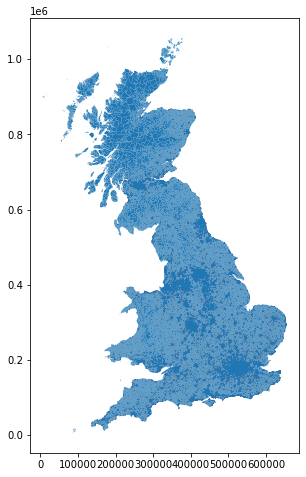

In [10]:
#View view map fr postcode geometry for the whoel fo the UK, first output
f,ax = plt.subplots(1, figsize=(16, 8))
postcodes.plot(ax=ax)
plt.show()

In [13]:
#Dissolve geometry to form postcode zones
postcodes_dissolved = postcodes.dissolve('postcode zones')

KeyboardInterrupt: 

In [8]:
#Convert to geodataframe
dissolved_postcodes = gpd.read_file(dissolved)

KeyboardInterrupt: 

In [6]:
#dissolved_postcodes = r'C:\\Users\\medshesa\\Documents\\Whytehawk Project\\Crime data\\postcodes_dissolved.shp'

In [7]:
#dissolved_postcodes

'C:\\\\Users\\\\medshesa\\\\Documents\\\\Whytehawk Project\\\\Crime data\\\\postcodes_dissolved.shp'

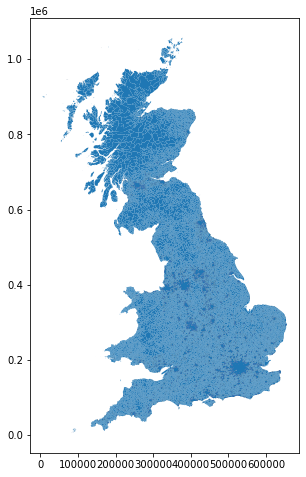

In [75]:
#Mapped dissolved postcode for the UK
f,ax = plt.subplots(1, figsize=(16, 8))
dissolved_postcodes.plot(ax=ax)
plt.show()

In [5]:
#Set index as postcode zones
dissolved_postcodes.set_index('postcode zones')

POSTCODE                   UPP PC_AREA  \
postcode zones                                           
AB10 1A         AB10 1AL  00000000000000000003      AB   
AB10 1B         AB10 1BA  00000000000000000009      AB   
AB10 1D         AB10 1DB  00000000000000000014      AB   
AB10 1F         AB10 1FE  00000000000000000015      AB   
AB10 1H         AB10 1HE  00000000000000000023      AB   
...                  ...                   ...     ...   
YO8 9T           YO8 9TA  00004000000001971073      YO   
YO8 9U           YO8 9UA  00004000000002127127      YO   
YO8 9X           YO8 9XB  00004000000001578182      YO   
YO8 9Y           YO8 9YA  00004000000001578192      YO   
YO90 1W         YO90 1WR  00000000000000841679      YO   

                                                         geometry  
postcode zones                                                     
AB10 1A         MULTIPOLYGON (((394223.403 806271.496, 394208....  
AB10 1B         MULTIPOLYGON (((393242.439 805780.507, 393247....  
AB10 1D         POLYGON ((392795.565 805807.309, 392824.059 80...  
AB10 1F         MULTIPOLYGON (((392876.515 805980.080, 392827....  
AB10 1H         MULTIPOLYGON (((394191.462 806236.117, 394188....  
...                                                           ...  
YO8 9T          MULTIPOLYGON (((458025.549 431055.271, 458100....  
YO8 9U          MULTIPOLYGON (((456351.423 430716.558, 456281....  
YO8 9X          POLYGON ((461184.933 430833.315, 461187.002 43...  
YO8 9Y          MULTIPOLYGON (((454987.219 430518.585, 454991....  
YO90 1W         POLYGON ((459970.361 451881.540, 459980.000 45...  

[133239 rows x 4 columns]

In [ ]:
#crs of geodataframe
postcodes_dissolved.crs

In [ ]:
#postcodes_dissolved['geometry']

In [ ]:
#postcodes_dissolved

In [ ]:
#Determine the centroid of the postcode dissolved 
postcodes_dissolved.centroid
postcodes['centroid'] = postcodes_dissolved.centroid

In [ ]:
#first output
f,ax = plt.subplots(1, figsize=(16, 8))
postcodes_dissolved.plot(ax=ax)
plt.show()

# Cluster mapping first attempt, for final versus see next section

In [ ]:
#import dissolved postcodes
file = r'C:\\Users\\medshesa\\Documents\\Whytehawk Project\\Crime data\\postcodes_dissolved.shp'
postcodes_dissolved = gpd.read_file(file)

In [ ]:
#reset index
dissolved_postcodes = dissolved_postcodes.set_index('postcode zones')

In [ ]:
#import cluster table
os.chdir("C:/Users/medshesa/Documents/Whytehawk Project/Whytehawk Data")
table_with_clusters = pd.read_csv('table with clusters.csv', index_col = 0)

In [ ]:
table_with_clusters

In [21]:
#merge geodataframe with cluster data
clusters_and_shape= pd.merge(table_with_clusters, dissolved_postcodes, left_index=True, right_index=True)

## Removing all unit postcodes that have a floor space below 100m2
### This is done by merging the postcode dataframe with a dataframe where I have previously removed all floor space below 100m2 called "floorspace"

In [99]:
#import postcode units with total commercial floorspace 
floorspace = pd.read_csv('C:/Users/medshesa/Documents/Whytehawk Project/Whytehawk Data/table with floorspace.csv')

In [100]:
floorspace

Unit Postcode  Agricultural General  Industrial General  \
0            AL1 1BX                0.0000              0.0000   
1            AL1 1BY                0.0000              0.0000   
2            AL1 1BZ                0.0000              0.0000   
3            AL1 1DQ                0.0000              0.0000   
4            AL1 1ER                0.0000              0.0000   
...              ...                   ...                 ...   
323162       YO8 9RY                0.0000              0.0000   
323163       YO8 9SE                0.0000            453.4800   
323164       YO8 9SS                0.0000              0.0000   
323165       YO8 9TQ                0.0000              0.0000   
323166       YO8 9UB                0.0000              0.0000   

        Industrial Light  Leisure 4/ 5 Star Hotels  \
0                 0.0000                    0.0000   
1                 0.0000                    0.0000   
2                 0.0000                    0.0000   
3                 0.0000                    0.0000   
4                 0.0000                    0.0000   
...                  ...                       ...   
323162            0.0000                    0.0000   
323163            0.0000                    0.0000   
323164            0.0000                    0.0000   
323165            0.0000                    0.0000   
323166            0.0000                    0.0000   

        Leisure Amusement & Entertainment Centres  Leisure Budget Hotels  \
0                                          0.0000                 0.0000   
1                                          0.0000                 0.0000   
2                                          0.0000                 0.0000   
3                                          0.0000                 2.0000   
4                                          0.0000                 0.0000   
...                                           ...                    ...   
323162                                     0.0000                 0.0000   
323163                                     0.0000                 0.0000   
323164                                     0.0000                 0.0000   
323165                                     0.0000                 0.0000   
323166                                     0.0000                 0.0000   

        Leisure Cinemas  Leisure Cultural Attractions  \
0                0.0000                        0.0000   
1                0.0000                        0.0000   
2                0.0000                        0.0000   
3                0.0000                        0.0000   
4                0.0000                        0.0000   
...                 ...                           ...   
323162           0.0000                        0.0000   
323163           0.0000                        0.0000   
323164           0.0000                      193.8468   
323165           0.0000                      190.0485   
323166           0.0000                      437.1050   

        Leisure General Hotels (3 star)  ...  Other Public  \
0                                0.0000  ...        0.0000   
1                                0.0000  ...        0.0000   
2                                0.0000  ...        0.0000   
3                                0.0000  ...      182.1697   
4                                0.0000  ...      102.6000   
...                                 ...  ...           ...   
323162                           0.0000  ...      118.4623   
323163                           0.0000  ...        0.0000   
323164                           0.0000  ...        0.0000   
323165                           0.0000  ...        0.0000   
323166                           0.0000  ...        0.0000   

        Retail Financial & Professional Services  Retail Food Superstores  \
0                                         0.0000                   0.0000   
1                                         0.0000                   0

In [101]:
#check one unit postcode
floorspace.loc[floorspace['Unit Postcode'] == 'LS12 5NL']

Unit Postcode  Agricultural General  Industrial General  \
148164      LS12 5NL                0.0000              0.0000   

        Industrial Light  Leisure 4/ 5 Star Hotels  \
148164            0.0000                    0.0000   

        Leisure Amusement & Entertainment Centres  Leisure Budget Hotels  \
148164                                     0.0000                 0.0000   

        Leisure Cinemas  Leisure Cultural Attractions  \
148164           0.0000                        0.0000   

        Leisure General Hotels (3 star)  ...  Other Public  \
148164                           0.0000  ...        2.0000   

        Retail Financial & Professional Services  Retail Food Superstores  \
148164                                    0.0000                   0.0000   

        Retail High Street  Retail Other Superstores/ Retail Warehouses  \
148164              0.0000                                    1233.6600   

        Retail Restaurants & Cafes  Unknown  Warehouse & Distribution  \
148164                      0.0000   0.0000                    0.0000   

        Warehousing  Large Scale and High Bay     Total  
148164                                 0.0000 1235.6600  

[1 rows x 27 columns]

In [102]:
#Floorspace describe to check that min total floorspace is 100m2
floorspace.describe()

Agricultural General  Industrial General  Industrial Light  \
count           323167.0000         323167.0000       323167.0000   
mean                 0.3995            853.5144          142.7139   
std                 29.0387           7119.7872         2421.3839   
min                  0.0000              0.0000            0.0000   
25%                  0.0000              0.0000            0.0000   
50%                  0.0000              0.0000            0.0000   
75%                  0.0000             98.6050            0.0000   
max               8834.6200        1659725.6776       331513.5100   

       Leisure 4/ 5 Star Hotels  Leisure Amusement & Entertainment Centres  \
count               323167.0000                                323167.0000   
mean                     0.0027                                    39.1398   
std                      1.0159                                  6178.3173   
min                      0.0000                                     0.0000   
25%                      0.0000                                     0.0000   
50%                      0.0000                                     0.0000   
75%                      0.0000                                     0.0000   
max                    505.2000                               3254329.3729   

       Leisure Budget Hotels  Leisure Cinemas  Leisure Cultural Attractions  \
count            323167.0000      323167.0000                   323167.0000   
mean                  1.0541           0.0025                       10.5029   
std                  15.5498           1.1644                      779.3055   
min                   0.0000           0.0000                        0.0000   
25%                   0.0000           0.0000                        0.0000   
50%                   0.0000           0.0000                        0.0000   
75%                   0.0000           0.0000                        0.0000   
max                3063.9900         642.3600                   215655.9942   

       Leisure General Hotels (3 star)  Leisure Periodic Use  ...  \
count                      323167.0000           323167.0000  ...   
mean                            0.7899               11.3174  ...   
std                            15.8880              846.4437  ...   
min                             0.0000                0.0000  ...   
25%                             0.0000                0.0000  ...   
50%                             0.0000                0.0000  ...   
75%                             0.0000                0.0000  ...   
max                          1851.6525           361895.7738  ...   

       Other Public  Retail Financial & Professional Services  \
count   323167.0000                               323167.0000   
mean       296.2903                                    9.6971   
std       4706.6495                                   99.7173   
min          0.0000                                    0.0000   
25%          0.0000                                    0.0000   
50%          0.0000                                    0.0000   
75%        115.4000                                    0.0000   
max    2270099.4486                                33495.2000   

       Retail Food Superstores  Retail High Street  \
count              323167.0000         323167.0000   
mean                    5.4701            187.8538   
std                    47.9747            619.6563   
min                     0.0000              0.0000   
25%                     0.0000              0.0000   
50%                     0.0000              0.0000   
75%                     0.0000            140.4000   
max                  2363.7600          65423.5700   

       Retail Other Superstores/ Retail Warehouses  \
count                                  323167.0000   
mean                                      193.8082   
std                                      1366.9040   
min                                         0.0000   
25%  

In [103]:
#filter floorspace and unit postcode out
floorpace2 = floorspace.filter(['Unit Postcode', 'Total'], axis=1)

In [104]:
floorpace2

Unit Postcode     Total
0            AL1 1BX  429.3000
1            AL1 1BY  219.5000
2            AL1 1BZ 1527.2700
3            AL1 1DQ  184.1697
4            AL1 1ER 1203.5000
...              ...       ...
323162       YO8 9RY  118.4623
323163       YO8 9SE  453.4800
323164       YO8 9SS  193.8468
323165       YO8 9TQ  190.0485
323166       YO8 9UB  437.1050

[323167 rows x 2 columns]

In [105]:
postcodes

POSTCODE                   UPP PC_AREA  \
0        AB10 1AL  00000000000000000003      AB   
1        AB10 1AN  00000000000000000004      AB   
2        AB10 1AP  00000000000000000005      AB   
3        AB10 1AS  00000000000000000006      AB   
4        AB10 1AU  00000000000000000007      AB   
...           ...                   ...     ...   
1699426   YO8 9YB  00004000000001578193      YO   
1699427   YO8 9YD  00004000000001578194      YO   
1699428   YO8 9YE  00004000000001578195      YO   
1699429   YO8 9YF  00004000000001578196      YO   
1699430  YO90 1WR  00000000000000841679      YO   

                                                  geometry  
0        POLYGON ((394285.159 806498.811, 394303.685 80...  
1        POLYGON ((394374.626 806579.248, 394378.484 80...  
2        POLYGON ((394285.159 806498.811, 394345.620 80...  
3        POLYGON ((394177.206 806370.608, 394194.166 80...  
4        POLYGON ((394223.403 806271.496, 394208.999 80...  
...                                                    ...  
1699426  POLYGON ((455471.938 430709.410, 455470.001 43...  
1699427  POLYGON ((454691.997 430710.000, 454747.214 43...  
1699428  POLYGON ((454753.002 430725.995, 454781.043 43...  
1699429  POLYGON ((454987.219 430518.585, 454991.688 43...  
1699430  POLYGON ((459970.361 451881.540, 459980.000 45...  

[1699431 rows x 4 columns]

In [106]:
#merge postcode column and floorspace dataframes
df3 = postcodes.merge(floorpace2, left_on='POSTCODE', right_on='Unit Postcode')

In [107]:
df3

POSTCODE                   UPP PC_AREA  \
0       AL1 1BX  00004000000000026125      AL   
1       AL1 1BY  00004000000000026126      AL   
2       AL1 1BZ  00004000000000026127      AL   
3       AL1 1DQ  00004000000000026132      AL   
4       AL1 1ER  00004000000000026143      AL   
...         ...                   ...     ...   
293925  YO8 9RY  00004000000001578172      YO   
293926  YO8 9SE  00004000000001578175      YO   
293927  YO8 9SS  00004000000001709127      YO   
293928  YO8 9TQ  00004000000002116819      YO   
293929  YO8 9UB  00004000000002142544      YO   

                                                 geometry Unit Postcode  \
0       POLYGON ((514648.003 206939.004, 514635.001 20...       AL1 1BX   
1       POLYGON ((514531.154 207093.169, 514558.371 20...       AL1 1BY   
2       POLYGON ((514669.572 207006.724, 514663.001 20...       AL1 1BZ   
3       POLYGON ((514416.408 206868.904, 514433.970 20...       AL1 1DQ   
4       POLYGON ((514698.991 207095.879, 514697.531 20...       AL1 1ER   
...                                                   ...           ...   
293925  MULTIPOLYGON (((459734.157 431021.251, 459695....       YO8 9RY   
293926  POLYGON ((458694.669 431756.770, 458697.967 43...       YO8 9SE   
293927  POLYGON ((459578.638 430234.646, 459621.026 43...       YO8 9SS   
293928  POLYGON ((457926.922 431278.227, 457946.092 43...       YO8 9TQ   
293929  POLYGON ((456351.423 430716.558, 456281.999 43...       YO8 9UB   

           Total  
0       429.3000  
1       219.5000  
2      1527.2700  
3       184.1697  
4      1203.5000  
...          ...  
293925  118.4623  
293926  453.4800  
293927  193.8468  
293928  190.0485  
293929  437.1050  

[293930 rows x 6 columns]

In [138]:
#describe merged dataframe
df3.describe()

Total
count  293930.0000
mean     2549.6415
std     10760.6937
min       100.0064
25%       280.5400
50%       667.4266
75%      1845.5185
max   2687993.7898

In [108]:
#check postcode 
df3.loc[df3['POSTCODE'] == 'LS12 5NL']

POSTCODE                   UPP PC_AREA  \
136052  LS12 5NL  00000000000000366001      LS   

                                                 geometry Unit Postcode  \
136052  POLYGON ((426603.415 431812.494, 426628.835 43...      LS12 5NL   

           Total  
136052 1235.6600

In [109]:
#create postcode zone column 
df3['Postcode zone'] = df3['POSTCODE'].str[:-1]

In [110]:
#import lastest cluster output
clustertable2 =pd.read_csv('C:/Users/medshesa/Documents/Whytehawk Project/Whytehawk Data/table with clusters2.csv')

In [111]:
clustertable2

Unnamed: 0  Agricultural General  Industrial General  Industrial Light  \
0         AL1 1B                0.0000              0.0000            0.0000   
1         AL1 1D                0.0000              0.0000            0.0000   
2         AL1 1E                0.0000              0.0000            0.0000   
3         AL1 1H                0.0000              0.0000            0.0000   
4         AL1 1J                0.0000              0.3926            0.0000   
...          ...                   ...                 ...               ...   
87238     YO8 9P                0.0000              0.3704            0.0000   
87239     YO8 9R                0.0000              0.0000            0.0000   
87240     YO8 9S                0.0000              0.7005            0.0000   
87241     YO8 9T                0.0000              0.0000            0.0000   
87242     YO8 9U                0.0000              0.0000            0.0000   

       Leisure 4/ 5 Star Hotels  Leisure Amusement & Entertainment Centres  \
0                        0.0000                                     0.0000   
1                        0.0000                                     0.0000   
2                        0.0000                                     0.0000   
3                        0.0000                                     0.0000   
4                        0.0000                                     0.1878   
...                         ...                                        ...   
87238                    0.0000                                     0.0000   
87239                    0.0000                                     0.0000   
87240                    0.0000                                     0.0000   
87241                    0.0000                                     0.0000   
87242                    0.0000                                     0.0000   

       Leisure Budget Hotels  Leisure Cinemas  Leisure Cultural Attractions  \
0                     0.0000           0.0000                        0.0000   
1                     0.0107           0.0000                        0.0000   
2                     0.0000           0.0000                        0.0000   
3                     0.0000           0.0000                        0.0000   
4                     0.0000           0.0000                        0.0429   
...                      ...              ...                           ...   
87238                 0.0000           0.0000                        0.0000   
87239                 0.0147           0.0000                        0.0000   
87240                 0.0000           0.0000                        0.2995   
87241                 0.0000           0.0000                        1.0000   
87242                 0.0000           0.0000                        1.0000   

       Leisure General Hotels (3 star)  ...  Warehouse & Distribution  \
0                               0.0000  ...                    0.0000   
1                               0.0000  ...                    0.0000   
2                               0.0000  ...                    0.0000   
3                               0.0103  ...                    0.0000   
4                               0.0000  ...                    0.0000   
...                                ...  ...                       ...   
87238                           0.0000  ...                    0.0000   
87239                           0.0000  ...                    0.0000   
87240                           0.0000  ...                    0.0000   
87241                           0.0000  ...                    0.0000   
87242                           0.0000  ...                    0.0000   

       Warehousing  Large Scale and High Bay  diversity  \
0                                     0.0000     0.6888   
1                                     0.0000     0.0481   
2                                     0.0000     0.7234   
3                                     0.0000  

In [127]:
df3

POSTCODE                   UPP PC_AREA  \
0       AL1 1BX  00004000000000026125      AL   
1       AL1 1BY  00004000000000026126      AL   
2       AL1 1BZ  00004000000000026127      AL   
3       AL1 1DQ  00004000000000026132      AL   
4       AL1 1ER  00004000000000026143      AL   
...         ...                   ...     ...   
293925  YO8 9RY  00004000000001578172      YO   
293926  YO8 9SE  00004000000001578175      YO   
293927  YO8 9SS  00004000000001709127      YO   
293928  YO8 9TQ  00004000000002116819      YO   
293929  YO8 9UB  00004000000002142544      YO   

                                                 geometry Unit Postcode  \
0       POLYGON ((514648.003 206939.004, 514635.001 20...       AL1 1BX   
1       POLYGON ((514531.154 207093.169, 514558.371 20...       AL1 1BY   
2       POLYGON ((514669.572 207006.724, 514663.001 20...       AL1 1BZ   
3       POLYGON ((514416.408 206868.904, 514433.970 20...       AL1 1DQ   
4       POLYGON ((514698.991 207095.879, 514697.531 20...       AL1 1ER   
...                                                   ...           ...   
293925  MULTIPOLYGON (((459734.157 431021.251, 459695....       YO8 9RY   
293926  POLYGON ((458694.669 431756.770, 458697.967 43...       YO8 9SE   
293927  POLYGON ((459578.638 430234.646, 459621.026 43...       YO8 9SS   
293928  POLYGON ((457926.922 431278.227, 457946.092 43...       YO8 9TQ   
293929  POLYGON ((456351.423 430716.558, 456281.999 43...       YO8 9UB   

           Total Postcode zone  
0       429.3000        AL1 1B  
1       219.5000        AL1 1B  
2      1527.2700        AL1 1B  
3       184.1697        AL1 1D  
4      1203.5000        AL1 1E  
...          ...           ...  
293925  118.4623        YO8 9R  
293926  453.4800        YO8 9S  
293927  193.8468        YO8 9S  
293928  190.0485        YO8 9T  
293929  437.1050        YO8 9U  

[293930 rows x 7 columns]

In [128]:
df3.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 293930 entries, 0 to 293929
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   POSTCODE       293930 non-null  object  
 1   UPP            293930 non-null  object  
 2   PC_AREA        293930 non-null  object  
 3   geometry       293930 non-null  geometry
 4   Unit Postcode  293930 non-null  object  
 5   Total          293930 non-null  float64 
 6   Postcode zone  293930 non-null  object  
dtypes: float64(1), geometry(1), object(5)
memory usage: 17.9+ MB


In [139]:
#merge clusters with geometry 
df4 = df3.merge(clustertable2, left_on='Postcode zone', right_on='Unnamed: 0')

In [130]:
df4

POSTCODE                   UPP PC_AREA  \
0       AL1 1BX  00004000000000026125      AL   
1       AL1 1BY  00004000000000026126      AL   
2       AL1 1BZ  00004000000000026127      AL   
3       AL1 1DQ  00004000000000026132      AL   
4       AL1 1ER  00004000000000026143      AL   
...         ...                   ...     ...   
293925  YO8 9RY  00004000000001578172      YO   
293926  YO8 9SE  00004000000001578175      YO   
293927  YO8 9SS  00004000000001709127      YO   
293928  YO8 9TQ  00004000000002116819      YO   
293929  YO8 9UB  00004000000002142544      YO   

                                                 geometry Unit Postcode  \
0       POLYGON ((514648.003 206939.004, 514635.001 20...       AL1 1BX   
1       POLYGON ((514531.154 207093.169, 514558.371 20...       AL1 1BY   
2       POLYGON ((514669.572 207006.724, 514663.001 20...       AL1 1BZ   
3       POLYGON ((514416.408 206868.904, 514433.970 20...       AL1 1DQ   
4       POLYGON ((514698.991 207095.879, 514697.531 20...       AL1 1ER   
...                                                   ...           ...   
293925  MULTIPOLYGON (((459734.157 431021.251, 459695....       YO8 9RY   
293926  POLYGON ((458694.669 431756.770, 458697.967 43...       YO8 9SE   
293927  POLYGON ((459578.638 430234.646, 459621.026 43...       YO8 9SS   
293928  POLYGON ((457926.922 431278.227, 457946.092 43...       YO8 9TQ   
293929  POLYGON ((456351.423 430716.558, 456281.999 43...       YO8 9UB   

           Total Postcode zone Unnamed: 0  Agricultural General  \
0       429.3000        AL1 1B     AL1 1B                0.0000   
1       219.5000        AL1 1B     AL1 1B                0.0000   
2      1527.2700        AL1 1B     AL1 1B                0.0000   
3       184.1697        AL1 1D     AL1 1D                0.0000   
4      1203.5000        AL1 1E     AL1 1E                0.0000   
...          ...           ...        ...                   ...   
293925  118.4623        YO8 9R     YO8 9R                0.0000   
293926  453.4800        YO8 9S     YO8 9S                0.0000   
293927  193.8468        YO8 9S     YO8 9S                0.0000   
293928  190.0485        YO8 9T     YO8 9T                0.0000   
293929  437.1050        YO8 9U     YO8 9U                0.0000   

        Industrial General  ...  Warehouse & Distribution  \
0                   0.0000  ...                    0.0000   
1                   0.0000  ...                    0.0000   
2                   0.0000  ...                    0.0000   
3                   0.0000  ...                    0.0000   
4                   0.0000  ...                    0.0000   
...                    ...  ...                       ...   
293925              0.0000  ...                    0.0000   
293926              0.7005  ...                    0.0000   
293927              0.7005  ...                    0.0000   
293928              0.0000  ...                    0.0000   
293929              0.0000  ...                    0.0000   

        Warehousing  Large Scale and High Bay  diversity  \
0                                      0.0000     0.6888   
1                                      0.0000     0.6888   
2                                      0.0000     0.6888   
3                                      0.0000     0.0481   
4                                      0.0000     0.7234   
...                                       ...        ...   
293925                                 0.0000     0.0329   
293926                                 0.0000     0.4755   
293927                                 0.0000     0.4755   
293928                                 0.0000     0.0000   
293929                                 0.0000     0.0000   

        accessibility data combined    Bus   Rail   Road  crime per business  \
0                            0.0008 0.0000 0.0384 0.0007              0.0038   
1                            0.0008 0.0000 0.0384 0.0007              0.0038   
2                 

In [140]:
#convert dataframe to geodataframe
df1 = gpd.GeoDataFrame(df4, geometry='geometry')

In [141]:
#check a test postcode
df1.loc[df3['POSTCODE'] == 'LS12 5NL']

POSTCODE                   UPP PC_AREA  \
136052  LS12 5NL  00000000000000366001      LS   

                                                 geometry Unit Postcode  \
136052  POLYGON ((426603.415 431812.494, 426628.835 43...      LS12 5NL   

           Total Postcode zone Unnamed: 0  Agricultural General  \
136052 1235.6600       LS12 5N    LS12 5N                0.0000   

        Industrial General  ...  Warehouse & Distribution  \
136052              0.0000  ...                    0.0000   

        Warehousing  Large Scale and High Bay  diversity  \
136052                                 0.0000     0.5846   

        accessibility data combined    Bus   Rail   Road  crime per business  \
136052                       0.0005 0.0000 0.0223 0.0007              0.0365   

        Urban_Rural_Index1  Clusters  
136052              0.0000         1  

[1 rows x 41 columns]

In [133]:
df1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 293930 entries, 0 to 293929
Data columns (total 41 columns):
 #   Column                                       Non-Null Count   Dtype   
---  ------                                       --------------   -----   
 0   POSTCODE                                     293930 non-null  object  
 1   UPP                                          293930 non-null  object  
 2   PC_AREA                                      293930 non-null  object  
 3   geometry                                     293930 non-null  geometry
 4   Unit Postcode                                293930 non-null  object  
 5   Total                                        293930 non-null  float64 
 6   Postcode zone                                293930 non-null  object  
 7   Unnamed: 0                                   293930 non-null  object  
 8   Agricultural General                         293930 non-null  float64 
 9   Industrial General                      

In [83]:
#drop old geometry column to focus on the geometry of the unit postcode instead of the postcode zone
#df2 = df2.drop(['geometry'], axis=1)

In [84]:
#rename geomerty column
#df2 = df2.rename(columns={"geometry_y": "geometry"})

In [90]:
#convert to geodataframe
#df2 = gpd.GeoDataFrame(df2, geometry='geometry')

# Mapping output

In [146]:
df1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 293930 entries, 0 to 293929
Data columns (total 43 columns):
 #   Column                                       Non-Null Count   Dtype   
---  ------                                       --------------   -----   
 0   POSTCODE                                     293930 non-null  object  
 1   UPP                                          293930 non-null  object  
 2   PC_AREA                                      293930 non-null  object  
 3   geometry                                     293930 non-null  geometry
 4   Unit Postcode                                293930 non-null  object  
 5   Total                                        293930 non-null  float64 
 6   Postcode zone                                293930 non-null  object  
 7   Unnamed: 0                                   293930 non-null  object  
 8   Agricultural General                         293930 non-null  float64 
 9   Industrial General                      

In [149]:
#describe data
df1.describe()

Total  Agricultural General  Industrial General  \
count  293930.0000           293930.0000         293930.0000   
mean     2549.6415                0.0006              0.2150   
std     10760.6937                0.0103              0.2815   
min       100.0064                0.0000              0.0000   
25%       280.5400                0.0000              0.0000   
50%       667.4266                0.0000              0.0630   
75%      1845.5185                0.0000              0.3730   
max   2687993.7898                1.0000              1.0000   

       Industrial Light  Leisure 4/ 5 Star Hotels  \
count       293930.0000               293930.0000   
mean             0.0347                    0.0000   
std              0.1081                    0.0031   
min              0.0000                    0.0000   
25%              0.0000                    0.0000   
50%              0.0000                    0.0000   
75%              0.0111                    0.0000   
max              1.0000                    1.0000   

       Leisure Amusement & Entertainment Centres  Leisure Budget Hotels  \
count                                293930.0000            293930.0000   
mean                                      0.0123                 0.0026   
std                                       0.0567                 0.0158   
min                                       0.0000                 0.0000   
25%                                       0.0000                 0.0000   
50%                                       0.0000                 0.0000   
75%                                       0.0000                 0.0000   
max                                       1.0000                 1.0000   

       Leisure Cinemas  Leisure Cultural Attractions  \
count      293930.0000                   293930.0000   
mean            0.0000                        0.0073   
std             0.0060                        0.0613   
min             0.0000                        0.0000   
25%             0.0000                        0.0000   
50%             0.0000                        0.0000   
75%             0.0000                        0.0000   
max             1.0000                        1.0000   

       Leisure General Hotels (3 star)  ...  Warehouse & Distribution  \
count                      293930.0000  ...               293930.0000   
mean                            0.0012  ...                    0.0024   
std                             0.0167  ...                    0.0298   
min                             0.0000  ...                    0.0000   
25%                             0.0000  ...                    0.0000   
50%                             0.0000  ...                    0.0000   
75%                             0.0000  ...                    0.0000   
max                             1.0000  ...                    1.0000   

       Warehousing  Large Scale and High Bay   diversity  \
count                            293930.0000 293930.0000   
mean                                  0.0586      0.6048   
std                                   0.1540      0.2456   
min                                   0.0000      0.0000   
25%                                   0.0000      0.4703   
50%                                   0.0000      0.6687   
75%                                   0.0201      0.7950   
max                                   1.0000      1.0000   

       accessibility data combined         Bus        Rail        Road  \
count                  293930.0000 293930.0000 293930.0000 293930.0000   
mean                        0.0009      0.0004      0.0235      0.0008   
std                         0.0089      0.0088      0.0258      0.0058   
min                         0.0000      0.0000      0.0000      0.0000   
25%                         0.0002      0.0000      0.0065      0.0001   
50%                         0.0004      0.0000      0.0178      0.0004   
75%                         0.0007      0.0000      0.0327  

In [24]:
#convert postcode to str
df1['POSTCODE'] = df1['POSTCODE'].astype(str)

In [144]:
#create postcode district and postcode area 
df1['postcode district'] = df1['POSTCODE'].str[:-3]
df1['postcode area'] = df1['POSTCODE'].str[:2]

In [165]:
#create postcode district with postcode from object
df1['postcode district'] = df1.apply(lambda row: row["POSTCODE"][:-4], axis=1)

In [ ]:
#convert type to string
df1['postcode district'] = df1['postcode district'].astype('|S') 

In [181]:
df1

POSTCODE                   UPP PC_AREA  \
0       AL1 1BX  00004000000000026125      AL   
1       AL1 1BY  00004000000000026126      AL   
2       AL1 1BZ  00004000000000026127      AL   
3       AL1 1DQ  00004000000000026132      AL   
4       AL1 1ER  00004000000000026143      AL   
...         ...                   ...     ...   
293925  YO8 9RY  00004000000001578172      YO   
293926  YO8 9SE  00004000000001578175      YO   
293927  YO8 9SS  00004000000001709127      YO   
293928  YO8 9TQ  00004000000002116819      YO   
293929  YO8 9UB  00004000000002142544      YO   

                                                 geometry Unit Postcode  \
0       POLYGON ((514648.003 206939.004, 514635.001 20...       AL1 1BX   
1       POLYGON ((514531.154 207093.169, 514558.371 20...       AL1 1BY   
2       POLYGON ((514669.572 207006.724, 514663.001 20...       AL1 1BZ   
3       POLYGON ((514416.408 206868.904, 514433.970 20...       AL1 1DQ   
4       POLYGON ((514698.991 207095.879, 514697.531 20...       AL1 1ER   
...                                                   ...           ...   
293925  MULTIPOLYGON (((459734.157 431021.251, 459695....       YO8 9RY   
293926  POLYGON ((458694.669 431756.770, 458697.967 43...       YO8 9SE   
293927  POLYGON ((459578.638 430234.646, 459621.026 43...       YO8 9SS   
293928  POLYGON ((457926.922 431278.227, 457946.092 43...       YO8 9TQ   
293929  POLYGON ((456351.423 430716.558, 456281.999 43...       YO8 9UB   

           Total Postcode zone  Agricultural General  Industrial General  \
0       429.3000        AL1 1B                0.0000              0.0000   
1       219.5000        AL1 1B                0.0000              0.0000   
2      1527.2700        AL1 1B                0.0000              0.0000   
3       184.1697        AL1 1D                0.0000              0.0000   
4      1203.5000        AL1 1E                0.0000              0.0000   
...          ...           ...                   ...                 ...   
293925  118.4623        YO8 9R                0.0000              0.0000   
293926  453.4800        YO8 9S                0.0000              0.7005   
293927  193.8468        YO8 9S                0.0000              0.7005   
293928  190.0485        YO8 9T                0.0000              0.0000   
293929  437.1050        YO8 9U                0.0000              0.0000   

        Industrial Light  ...  Warehousing  Large Scale and High Bay  \
0                 0.0000  ...                                 0.0000   
1                 0.0000  ...                                 0.0000   
2                 0.0000  ...                                 0.0000   
3                 0.0000  ...                                 0.0000   
4                 0.0000  ...                                 0.0000   
...                  ...  ...                                    ...   
293925            0.0000  ...                                 0.0000   
293926            0.0000  ...                                 0.0000   
293927            0.0000  ...                                 0.0000   
293928            0.0000  ...                                 0.0000   
293929            0.0000  ...                                 0.0000   

        diversity  accessibility data combined    Bus   Rail   Road  \
0          0.6888                       0.0008 0.0000 0.0384 0.0007   
1          0.6888                       0.0008 0.0000 0.0384 0.0007   
2          0.6888                       0.0008 0.0000 0.0384 0.0007   
3          0.0481                       0.0006 0.0000 0.0321 0.0007   
4          0.7234                       0.0009 0.0000 0.0515 0.0008   
...           ...                          ...    ...    ...    ...   
293925     0.0329                       0.0002 0.0000 0.0077 0.0002   
293926     0.4755                       0.0002 0.0000 0.0076 0.0002   
293927     0.4755                       0.0002 0.0000 0.0076 0.0002   
293928     0.0000            

In [182]:
#rename column
#df1 = df1.drop(['postcode area'], axis=1)
df1.rename(columns={"Total": "Total floorspace"})

POSTCODE                   UPP PC_AREA  \
0       AL1 1BX  00004000000000026125      AL   
1       AL1 1BY  00004000000000026126      AL   
2       AL1 1BZ  00004000000000026127      AL   
3       AL1 1DQ  00004000000000026132      AL   
4       AL1 1ER  00004000000000026143      AL   
...         ...                   ...     ...   
293925  YO8 9RY  00004000000001578172      YO   
293926  YO8 9SE  00004000000001578175      YO   
293927  YO8 9SS  00004000000001709127      YO   
293928  YO8 9TQ  00004000000002116819      YO   
293929  YO8 9UB  00004000000002142544      YO   

                                                 geometry Unit Postcode  \
0       POLYGON ((514648.003 206939.004, 514635.001 20...       AL1 1BX   
1       POLYGON ((514531.154 207093.169, 514558.371 20...       AL1 1BY   
2       POLYGON ((514669.572 207006.724, 514663.001 20...       AL1 1BZ   
3       POLYGON ((514416.408 206868.904, 514433.970 20...       AL1 1DQ   
4       POLYGON ((514698.991 207095.879, 514697.531 20...       AL1 1ER   
...                                                   ...           ...   
293925  MULTIPOLYGON (((459734.157 431021.251, 459695....       YO8 9RY   
293926  POLYGON ((458694.669 431756.770, 458697.967 43...       YO8 9SE   
293927  POLYGON ((459578.638 430234.646, 459621.026 43...       YO8 9SS   
293928  POLYGON ((457926.922 431278.227, 457946.092 43...       YO8 9TQ   
293929  POLYGON ((456351.423 430716.558, 456281.999 43...       YO8 9UB   

        Total floorspace Postcode zone  Agricultural General  \
0               429.3000        AL1 1B                0.0000   
1               219.5000        AL1 1B                0.0000   
2              1527.2700        AL1 1B                0.0000   
3               184.1697        AL1 1D                0.0000   
4              1203.5000        AL1 1E                0.0000   
...                  ...           ...                   ...   
293925          118.4623        YO8 9R                0.0000   
293926          453.4800        YO8 9S                0.0000   
293927          193.8468        YO8 9S                0.0000   
293928          190.0485        YO8 9T                0.0000   
293929          437.1050        YO8 9U                0.0000   

        Industrial General  Industrial Light  ...  \
0                   0.0000            0.0000  ...   
1                   0.0000            0.0000  ...   
2                   0.0000            0.0000  ...   
3                   0.0000            0.0000  ...   
4                   0.0000            0.0000  ...   
...                    ...               ...  ...   
293925              0.0000            0.0000  ...   
293926              0.7005            0.0000  ...   
293927              0.7005            0.0000  ...   
293928              0.0000            0.0000  ...   
293929              0.0000            0.0000  ...   

        Warehousing  Large Scale and High Bay  diversity  \
0                                      0.0000     0.6888   
1                                      0.0000     0.6888   
2                                      0.0000     0.6888   
3                                      0.0000     0.0481   
4                                      0.0000     0.7234   
...                                       ...        ...   
293925                                 0.0000     0.0329   
293926                                 0.0000     0.4755   
293927                                 0.0000     0.4755   
293928                                 0.0000     0.0000   
293929                                 0.0000     0.0000   

        accessibility data combined    Bus   Rail   Road  crime per business  \
0                            0.0008 0.0000 0.0384 0.0007              0.0038   
1                            0.0008 0.0000 0.0384 0.0007              0.0038   
2                            0.0008 0.0000 0.0384 0.0007              0.0038   
3                            0.0006 0.0000 0.0321 0.0007              

In [36]:
df1.describe()

Total  Agricultural General  Industrial General  \
count  293930.0000           293930.0000         293930.0000   
mean     2549.6415                0.0006              0.2150   
std     10760.6937                0.0103              0.2815   
min       100.0064                0.0000              0.0000   
25%       280.5400                0.0000              0.0000   
50%       667.4266                0.0000              0.0630   
75%      1845.5185                0.0000              0.3730   
max   2687993.7898                1.0000              1.0000   

       Industrial Light  Leisure 4/ 5 Star Hotels  \
count       293930.0000               293930.0000   
mean             0.0347                    0.0000   
std              0.1081                    0.0031   
min              0.0000                    0.0000   
25%              0.0000                    0.0000   
50%              0.0000                    0.0000   
75%              0.0111                    0.0000   
max              1.0000                    1.0000   

       Leisure Amusement & Entertainment Centres  Leisure Budget Hotels  \
count                                293930.0000            293930.0000   
mean                                      0.0123                 0.0026   
std                                       0.0567                 0.0158   
min                                       0.0000                 0.0000   
25%                                       0.0000                 0.0000   
50%                                       0.0000                 0.0000   
75%                                       0.0000                 0.0000   
max                                       1.0000                 1.0000   

       Leisure Cinemas  Leisure Cultural Attractions  \
count      293930.0000                   293930.0000   
mean            0.0000                        0.0073   
std             0.0060                        0.0613   
min             0.0000                        0.0000   
25%             0.0000                        0.0000   
50%             0.0000                        0.0000   
75%             0.0000                        0.0000   
max             1.0000                        1.0000   

       Leisure General Hotels (3 star)  ...  Warehouse & Distribution  \
count                      293930.0000  ...               293930.0000   
mean                            0.0012  ...                    0.0024   
std                             0.0167  ...                    0.0298   
min                             0.0000  ...                    0.0000   
25%                             0.0000  ...                    0.0000   
50%                             0.0000  ...                    0.0000   
75%                             0.0000  ...                    0.0000   
max                             1.0000  ...                    1.0000   

       Warehousing  Large Scale and High Bay   diversity  \
count                            293930.0000 293930.0000   
mean                                  0.0586      0.6048   
std                                   0.1540      0.2456   
min                                   0.0000      0.0000   
25%                                   0.0000      0.4703   
50%                                   0.0000      0.6687   
75%                                   0.0201      0.7950   
max                                   1.0000      1.0000   

       accessibility data combined         Bus        Rail        Road  \
count                  293930.0000 293930.0000 293930.0000 293930.0000   
mean                        0.0009      0.0004      0.0235      0.0008   
std                         0.0089      0.0088      0.0258      0.0058   
min                         0.0000      0.0000      0.0000      0.0000   
25%                         0.0002      0.0000      0.0065      0.0001   
50%                         0.0004      0.0000      0.0178      0.0004   
75%                         0.0007      0.0000      0.0327  

In [91]:
#Can be use to convert dataframes to geodataframe was used in a previus version

#from shapely import wkt

#df['geometry'] = df['geometry'].apply(wkt.loads)

#df1 = gpd.GeoDataFrame(df, geometry = 'geometry')

In [175]:
df1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 293930 entries, 0 to 293929
Data columns (total 42 columns):
 #   Column                                       Non-Null Count   Dtype   
---  ------                                       --------------   -----   
 0   POSTCODE                                     293930 non-null  object  
 1   UPP                                          293930 non-null  object  
 2   PC_AREA                                      293930 non-null  object  
 3   geometry                                     293930 non-null  geometry
 4   Unit Postcode                                293930 non-null  object  
 5   Total                                        293930 non-null  float64 
 6   Postcode zone                                293930 non-null  object  
 7   Agricultural General                         293930 non-null  float64 
 8   Industrial General                           293930 non-null  float64 
 9   Industrial Light                        

In [175]:
#dataframe datatypes
df1.dtypes

POSTCODE                                         object
UPP                                              object
PC_AREA                                          object
geometry                                       geometry
Unit Postcode                                    object
Total                                           float64
Postcode zone                                    object
Unnamed: 0                                       object
Agricultural General                            float64
Industrial General                              float64
Industrial Light                                float64
Leisure 4/ 5 Star Hotels                        float64
Leisure Amusement & Entertainment Centres       float64
Leisure Budget Hotels                           float64
Leisure Cinemas                                 float64
Leisure Cultural Attractions                    float64
Leisure General Hotels (3 star)                 float64
Leisure Periodic Use                            

In [9]:
#save as CSV
#df1.to_csv("C:/Users/medshesa/Documents/Whytehawk Project/Whytehawk Data/cluster_and_geometry.csv", index=True, encoding='utf-8-sig')

In [189]:
#save shape file
df1.to_file("C:/Users/medshesa/Documents/Whytehawk Project/Whytehawk Data/clusters_and_geometry_updated2.shp")

In [170]:
#df info
df1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 293930 entries, 0 to 293929
Data columns (total 43 columns):
 #   Column                                       Non-Null Count   Dtype   
---  ------                                       --------------   -----   
 0   POSTCODE                                     293930 non-null  object  
 1   UPP                                          293930 non-null  object  
 2   PC_AREA                                      293930 non-null  object  
 3   geometry                                     293930 non-null  geometry
 4   Unit Postcode                                293930 non-null  object  
 5   Total                                        293930 non-null  float64 
 6   Postcode zone                                293930 non-null  object  
 7   Unnamed: 0                                   293930 non-null  object  
 8   Agricultural General                         293930 non-null  float64 
 9   Industrial General                      

In [161]:
#set CRS (coordinate reference system) to OSGB 1936 / British National Grid -- United Kingdom Ordnance Survey
df1 = df1.set_crs(epsg=27700)

In [185]:
#Creating specific areas/geodataframes for mapping examples

AL =df1.loc[df1['PC_AREA']=='AL']
B =df1.loc[df1['PC_AREA']=='B']
LS =df1.loc[df1['PC_AREA']=='LS']
LS6 = df1.loc[df1['postcode district'] == 'LS6']
LS1 = df1.loc[df1['postcode district'] == 'LS1']
SE10 = df1.loc[df1['postcode district'] == 'SE10']
LS12 = df1.loc[df1['postcode district'] == 'LS12']
LS12_5L = df1.loc[df1['Postcode zone'] == 'LS12 5L']
LS12_5N = df1.loc[df1['Postcode zone'] == 'LS12 5N']

SE = df1.loc[df1['PC_AREA'] == 'SE']
SW = df1.loc[df1['PC_AREA'] == 'SW']
W = df1.loc[df1['PC_AREA'] == 'W']
NW = df1.loc[df1['PC_AREA'] == 'NW']
N = df1.loc[df1['PC_AREA'] == 'N']
E = df1.loc[df1['PC_AREA'] == 'E']
WC = df1.loc[df1['PC_AREA'] == 'WC']
EC = df1.loc[df1['PC_AREA'] == 'EC']

DA = df1.loc[df1['PC_AREA'] == 'DA']
BR = df1.loc[df1['PC_AREA'] == 'BR']
CR = df1.loc[df1['PC_AREA'] == 'CR']
SM= df1.loc[df1['PC_AREA'] == 'SM']
KT= df1.loc[df1['PC_AREA'] == 'KT']
TW= df1.loc[df1['PC_AREA'] == 'TW']
UB= df1.loc[df1['PC_AREA'] == 'UB']
HA= df1.loc[df1['PC_AREA'] == 'HA']
WD= df1.loc[df1['PC_AREA'] == 'WD']
EN= df1.loc[df1['PC_AREA'] == 'EN']
IG= df1.loc[df1['PC_AREA'] == 'IG']
RM= df1.loc[df1['PC_AREA'] == 'RM']

outter_london = df1[df1['PC_AREA'].isin(['DA','BR','CR','SM','KT','TW','UB','HA','WD','EN','IG','RM'])]
inner_london = df1[df1['PC_AREA'].isin(['SE','SW','W','NW','N','E','WC','EC'])]
cbd = df1[df1['PC_AREA'].isin(['WC','EC'])]
london = df1[df1['PC_AREA'].isin(['DA','BR','CR','SM','KT','TW','UB','HA','WD','EN','IG','RM','SE','SW','W','NW','N','E','WC','EC'])]

In [146]:
#examine example sample geodataframe SE10 (Greenwich)
SE10

Empty GeoDataFrame
Columns: [POSTCODE, UPP, PC_AREA, geometry, Unit Postcode, Total, Postcode zone, Unnamed: 0, Agricultural General, Industrial General, Industrial Light, Leisure 4/ 5 Star Hotels, Leisure Amusement & Entertainment Centres, Leisure Budget Hotels, Leisure Cinemas, Leisure Cultural Attractions, Leisure General Hotels (3 star), Leisure Periodic Use, Leisure Sports centres and Private Clubs, Office Business Park, Office General, Office IT / Data Centres, Office Serviced Office, Other Commercial, Other Public, Retail Financial & Professional Services, Retail Food Superstores, Retail High Street, Retail Other Superstores/ Retail Warehouses, Retail Restaurants & Cafes, Unknown, Warehouse & Distribution, Warehousing  Large Scale and High Bay, diversity, accessibility data combined, Bus, Rail, Road, crime per business, Urban_Rural_Index1, Clusters, postcode district, postcode area]
Index: []

[0 rows x 43 columns]

In [176]:
#examine example sample geodataframe LS12 
LS12

POSTCODE                   UPP PC_AREA  \
135853  LS12 1AA  00000000000000365087      LS   
135854  LS12 1AE  00000000000000365089      LS   
135855  LS12 1AF  00000000000000365090      LS   
135856  LS12 1AH  00000000000000365091      LS   
135857  LS12 1AL  00000000000000365092      LS   
...          ...                   ...     ...   
136115  LS12 6NY  00004000000002093049      LS   
136116  LS12 6QA  00000000000000366182      LS   
136117  LS12 6QB  00000000000000366183      LS   
136118  LS12 6TG  00000000000000366184      LS   
136119  LS12 6UB  00000000000000366185      LS   

                                                 geometry Unit Postcode  \
135853  POLYGON ((428772.452 432699.000, 428771.908 43...      LS12 1AA   
135854  POLYGON ((428404.804 432666.880, 428411.310 43...      LS12 1AE   
135855  POLYGON ((429278.558 432810.658, 429277.965 43...      LS12 1AF   
135856  POLYGON ((428881.295 433298.109, 428897.999 43...      LS12 1AH   
135857  POLYGON ((428910.152 432853.156, 428919.280 43...      LS12 1AL   
...                                                   ...           ...   
136115  POLYGON ((427753.107 431411.719, 427759.002 43...      LS12 6NY   
136116  POLYGON ((427637.123 431644.092, 427615.059 43...      LS12 6QA   
136117  POLYGON ((427573.191 431699.657, 427551.779 43...      LS12 6QB   
136118  POLYGON ((427241.904 431288.404, 427326.499 43...      LS12 6TG   
136119  POLYGON ((428273.123 431777.624, 428224.064 43...      LS12 6UB   

           Total Postcode zone Unnamed: 0  Agricultural General  \
135853 3822.8800       LS12 1A    LS12 1A                0.0000   
135854 1050.0500       LS12 1A    LS12 1A                0.0000   
135855  645.6100       LS12 1A    LS12 1A                0.0000   
135856 2107.9100       LS12 1A    LS12 1A                0.0000   
135857 4500.9200       LS12 1A    LS12 1A                0.0000   
...          ...           ...        ...                   ...   
136115 3362.5900       LS12 6N    LS12 6N                0.0000   
136116 1203.1100       LS12 6Q    LS12 6Q                0.0000   
136117  553.3000       LS12 6Q    LS12 6Q                0.0000   
136118 5012.6600       LS12 6T    LS12 6T                0.0000   
136119 5736.2600       LS12 6U    LS12 6U                0.0000   

        Industrial General  ...  diversity  accessibility data combined  \
135853              0.5635  ...     0.6701                       0.0007   
135854              0.5635  ...     0.6701                       0.0007   
135855              0.5635  ...     0.6701                       0.0007   
135856              0.5635  ...     0.6701                       0.0007   
135857              0.5635  ...     0.6701                       0.0007   
...                    ...  ...        ...                          ...   
136115              0.5610  ...     0.5695                       0.0006   
136116              0.0000  ...     0.0000                       0.0010   
136117              0.0000  ...     0.0000                       0.0010   
136118              1.0000  ...     0.0000                       0.0006   
136119              0.7933  ...     0.3712                       0.0006   

          Bus   Rail   Road  crime per business  Urban_Rural_Index1  Clusters  \
135853 0.0000 0.0315 0.0009              0.0019              0.0000         3   
135854 0.0000 0.0315 0.0009              0.0019              0.0000         3   
135855 0.0000 0.0315 0.0009              0.0019              0.0000         3   
135856 0.0000 0.0315 0.0009              0.0019              0.0000         3   
135857 0.0000 0.0315 0.0009              0.0019              0.0000         3   
...       ...    ...    ...                 ...                 ...       ...   
136115 0.0000 0.0245 0.0007              0.0000              0.0000         3   
136116 0.0000 0.0321 0.0019              0.0073              0.0000         4   
136117 0.0000 0.0321 0.0019              0.0073              0.0000    

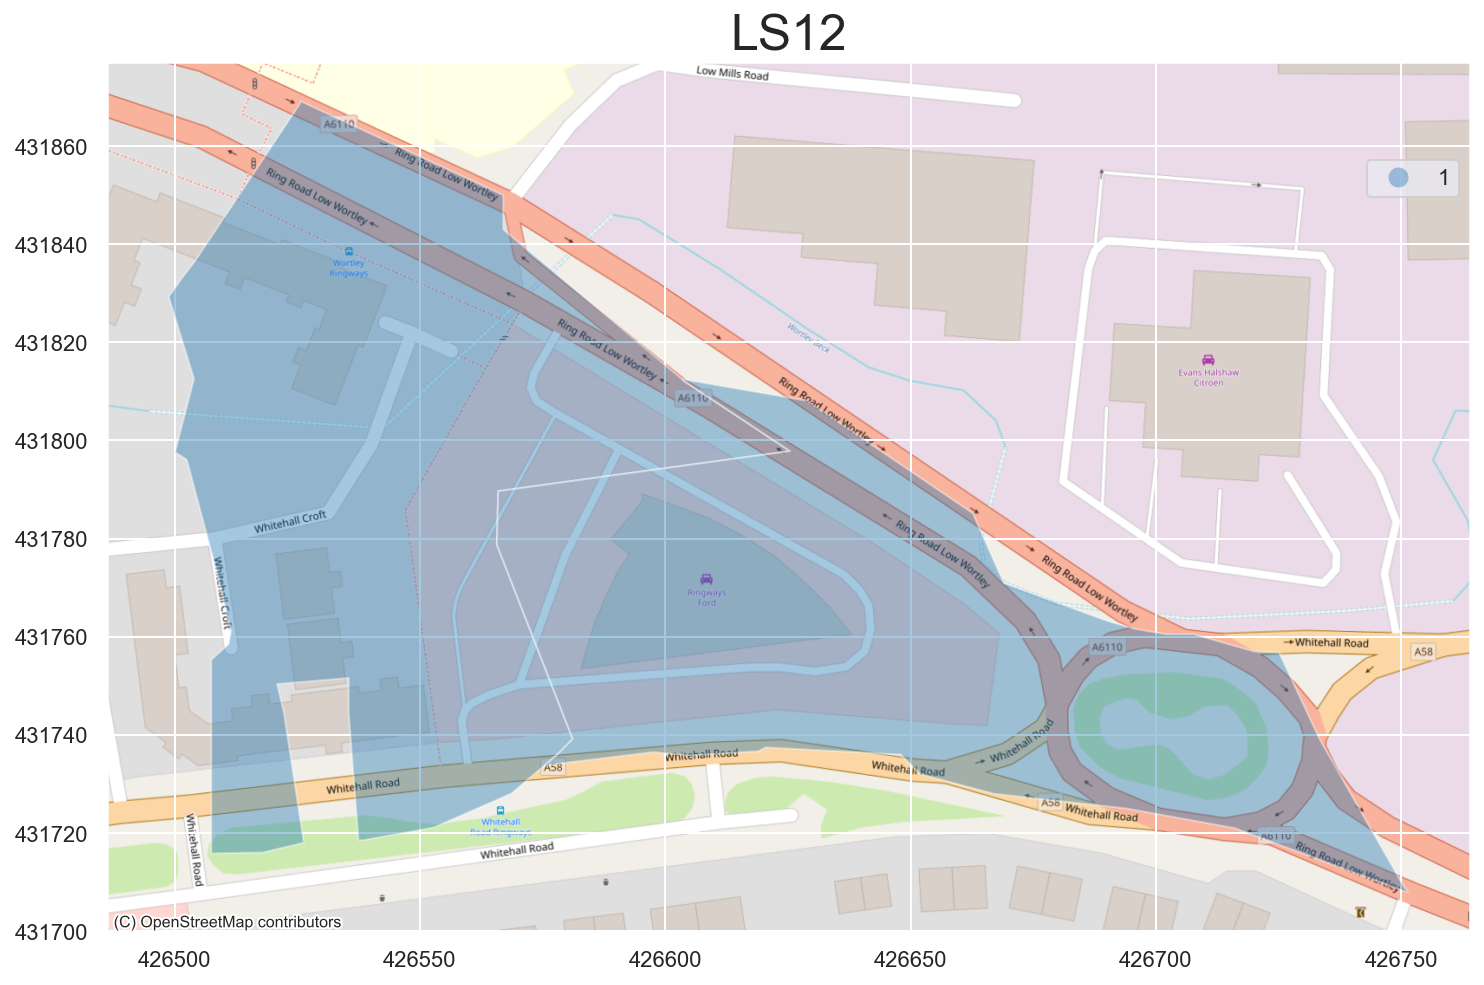

In [187]:
#Mapping clusters in LS12 
f,ax = plt.subplots(1, figsize=(16,8))

LS12.plot(column='Clusters',categorical=True, alpha=0.4, legend=True, ax=ax)


# make axis invisible for subplot 1
#ax.set_axis_off()

# Adjust legend location
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.0,0.9))
ax.set_title('LS12_5N', fontdict= 
            {'fontsize':25})

cx.add_basemap(ax, crs=27700, source=cx.providers.OpenStreetMap.Mapnik)

#cx.add_basemap(ax, zoom=12, source=ctx.providers.Stamen.TonerLite)

plt.show()

In [188]:
#LS12_5N dataframe to check
LS12

POSTCODE                   UPP PC_AREA  \
136051  LS12 5NJ  00000000000000366000      LS   
136052  LS12 5NL  00000000000000366001      LS   

                                                 geometry Unit Postcode  \
136051  POLYGON ((426603.415 431812.494, 426604.001 43...      LS12 5NJ   
136052  POLYGON ((426603.415 431812.494, 426628.835 43...      LS12 5NL   

           Total Postcode zone  Agricultural General  Industrial General  \
136051 1962.2500       LS12 5N                0.0000              0.0000   
136052 1235.6600       LS12 5N                0.0000              0.0000   

        Industrial Light  ...  Warehousing  Large Scale and High Bay  \
136051            0.5876  ...                                 0.0000   
136052            0.5876  ...                                 0.0000   

        diversity  accessibility data combined    Bus   Rail   Road  \
136051     0.5846                       0.0005 0.0000 0.0223 0.0007   
136052     0.5846                       0.0005 0.0000 0.0223 0.0007   

        crime per business  Urban_Rural_Index1  Clusters  postcode district  
136051              0.0365              0.0000         1               LS12  
136052              0.0365              0.0000         1               LS12  

[2 rows x 41 columns]

In [35]:
#lookup and examine an example for the SE10 geodataframe
SE10.loc[65255]

Unnamed_ 0                                                     SE10 0A
Agricultur                                                      0.0000
Industrial                                                      0.1969
Industri_1                                                      0.6870
Leisure 4/                                                      0.0000
Leisure Am                                                      0.0000
Leisure Bu                                                      0.0000
Leisure Ci                                                      0.0000
Leisure Cu                                                      0.0000
Leisure Ge                                                      0.0000
Leisure Pe                                                      0.0000
Leisure Sp                                                      0.0000
Office Bus                                                      0.0000
Office Gen                                                      0.0185
Office

In [39]:
#Lookup and check coordinates for SE10 example
from shapely.geometry import Point
for index, row in SE10.iterrows():
    for pt in list(row['geometry'].exterior.coords): 
         print point(pt)
            
#Find the center point
SE10['Center_point'] = SE10['geometry'].centroid
#Extract lat and lon from the centerpoint
SE10["lat"] = SE10.Center_point.map(lambda p: p.x)
SE10["long"] = SE10.Center_point.map(lambda p: p.y)

SyntaxError: invalid syntax (<ipython-input-39-446563685c7c>, line 4)

In [45]:
#SE10 including Lat and Long
SE10

Unnamed_ 0  Agricultur  Industrial  Industri_1  Leisure 4/  Leisure Am  \
65255    SE10 0A      0.0000      0.1969      0.6870      0.0000      0.0000   
65256    SE10 0B      0.0000      0.0000      0.0000      0.0000      0.0000   
65257    SE10 0D      0.0000      0.0000      0.0000      0.0000      0.0083   
65258    SE10 0E      0.0000      0.0129      0.0000      0.0000      0.0000   
65259    SE10 0F      0.0000      0.0000      0.0000      0.0000      0.0000   
65260    SE10 0G      0.0000      0.0000      0.0000      0.0000      0.0000   
65261    SE10 0H      0.0000      0.0000      0.0000      0.0000      0.0000   
65262    SE10 0J      0.0000      0.0000      0.0000      0.0000      0.0000   
65263    SE10 0L      0.0000      0.0000      0.0000      0.0000      0.0000   
65264    SE10 0N      0.0000      0.2135      0.0000      0.0000      0.0000   
65265    SE10 0P      0.0000      0.0427      0.0000      0.0000      0.0170   
65266    SE10 0Q      0.0000      0.1928      0.0000      0.0000      0.0000   
65267    SE10 0R      0.0000      0.8421      0.0000      0.0000      0.0000   
65268    SE10 0S      0.0000      0.5368      0.0000      0.0000      0.0000   
65269    SE10 0T      0.0000      0.0000      0.0000      0.0000      0.0000   
65270    SE10 0U      0.0000      0.0000      0.0000      0.0000      0.0000   
65271    SE10 0X      0.0000      0.0000      0.0000      0.0000      0.0000   
65272    SE10 8A      0.0000      0.0000      0.0000      0.0000      0.0000   
65273    SE10 8B      0.0000      0.2135      0.0000      0.0000      0.0000   
65274    SE10 8D      0.0000      0.0000      0.0000      0.0000      0.0000   
65275    SE10 8E      0.0000      0.0000      0.1610      0.0000      0.0000   
65276    SE10 8F      0.0000      0.0000      0.0000      0.0000      0.0000   
65277    SE10 8H      0.0000      0.0000      0.0000      0.0000      0.0000   
65278    SE10 8J      0.0000      0.3515      0.0580      0.0000      0.0000   
65279    SE10 8L      0.0000      0.1092      0.0000      0.0000      0.0000   
65280    SE10 8N      0.0000      0.0131      0.0000      0.0000      0.0000   
65281    SE10 8P      0.0000      0.0000      0.0000      0.0000      0.0000   
65282    SE10 8Q      0.0000      0.0303      0.0000      0.0000      0.0000   
65283    SE10 8R      0.0000      0.0784      0.0000      0.0000      0.0000   
65284    SE10 8S      0.0000      0.0987      0.0000      0.0000      0.0000   
65285    SE10 8U      0.0000      0.0000      0.0000      0.0000      0.0000   
65286    SE10 8X      0.0000      0.0000      0.0000      0.0000      0.9487   
65287    SE10 9A      0.0000      0.0000      0.0000      0.0000      0.0000   
65288    SE10 9B      0.0000      0.0082      0.0000      0.0000      0.0000   
65289    SE10 9E      0.0000      0.0000      0.0000      0.0000      0.0000   
65290    SE10 9F      0.0000      0.0000      0.0000      0.0000      0.0000   
65291    SE10 9G      0.0000      0.0000      0.0000      0.0000      0.0000   
65292    SE10 9H      0.0000      0.0000      0.0000      0.0000      0.0994   
65293    SE10 9J      0.0000      0.0020      0.0000      0.0000      0.0000   
65294    SE10 9L      0.0000      0.0000      0.0000      0.0000      0.0000   
65295    SE10 9N      0.0000      0.0000      0.0000      0.0000      0.0000   
65296    SE10 9P      0.0000      0.4922      0.0779      0.0000      0.0000   
65297    SE10 9Q      0.0000      0.6030      0.0280      0.0000      0.0000   
65298    SE10 9R      0.0000      0.0000      0.0000      0.0000      0.0000   
65299    SE10 9S      0.0000      0.0000      0.0000      0.0000      0.0000   
65300    SE10 9T      0.0000      0.0000      0.2692      0.0000      0.0000   
65301    SE10 9U      0.0000      0.0000      0.0000      0.0000      0.0000   
65302    SE10 9X      0.0000      0.2736      0.0000      0.0000      0.0000   

       Leisure Bu  Leisure Ci  Leisure Cu  Leisure Ge  ...  PC_AREA  Cluster2  \
6525

In [18]:
#examine inner London geodataframe
inner_london

Unnamed: 0 Unnamed: 0.1  Agricultural General  Industrial General  \
22854       22854        E1 0A                0.0000              0.2449   
22855       22855        E1 0B                0.0000              0.0000   
22856       22856        E1 0D                0.0000              0.1242   
22857       22857        E1 0E                0.0000              0.0000   
22858       22858        E1 0H                0.0000              0.1155   
...           ...          ...                   ...                 ...   
82985       82985      WC2R 2P                0.0000              0.0000   
82986       82986      WC2R 3A                0.0000              0.0000   
82987       82987      WC2R 3D                0.0000              0.0000   
82988       82988      WC2R 3J                0.0000              0.0000   
82989       82989      WC2R 3L                0.0000              0.0000   

       Industrial Light  Leisure 4/ 5 Star Hotels  \
22854            0.1638                    0.0000   
22855            0.0000                    0.0000   
22856            0.0000                    0.0000   
22857            0.0000                    0.0000   
22858            0.0000                    0.0000   
...                 ...                       ...   
82985            0.0000                    0.0000   
82986            0.0000                    0.0000   
82987            0.0000                    0.0000   
82988            0.0000                    0.0000   
82989            0.0000                    0.0000   

       Leisure Amusement & Entertainment Centres  Leisure Budget Hotels  \
22854                                     0.0000                 0.0000   
22855                                     0.0000                 0.0000   
22856                                     0.0000                 0.0000   
22857                                     0.0000                 0.0000   
22858                                     0.0000                 0.0000   
...                                          ...                    ...   
82985                                     0.0000                 0.0000   
82986                                     0.0000                 0.0000   
82987                                     0.0000                 0.0000   
82988                                     0.0000                 0.0000   
82989                                     0.0000                 0.0000   

       Leisure Cinemas  Leisure Cultural Attractions  ...   Road  \
22854           0.0000                        0.0000  ... 0.0021   
22855           0.0000                        0.0000  ... 0.0021   
22856           0.0000                        0.0000  ... 0.0021   
22857           0.0000                        0.0000  ... 0.0022   
22858           0.0000                        0.0000  ... 0.0022   
...                ...                           ...  ...    ...   
82985           0.0000                        0.0000  ... 0.0022   
82986           0.0000                        0.0000  ... 0.0022   
82987           0.0000                        0.0000  ... 0.0021   
82988           0.0000                        0.0000  ... 0.0022   
82989           0.0000                        0.0000  ... 0.0021   

       crime per business  Clusters  POSTCODE     UPP  PC_AREA  \
22854              0.0047         6    E1 0AA  199611        E   
22855              0.0177         1    E1 0BA  199624        E   
22856              0.0315         3    E1 0DA  199639        E   
22857              0.4256         3    E1 0EA  199654        E   
22858              0.0041         6    E1 0HA  199669        E   
...                   ...       ...       ...     ...      ...   
82985              0.0050         6  WC2R 2PG  804820       WC   
82986              0.0015         5  WC2R 3AA  804824       WC   
82987              0.0223         4  WC2R 3DA  804827       WC   
82988              0.0000         5  WC2R 3JE  804829       WC   
82989        

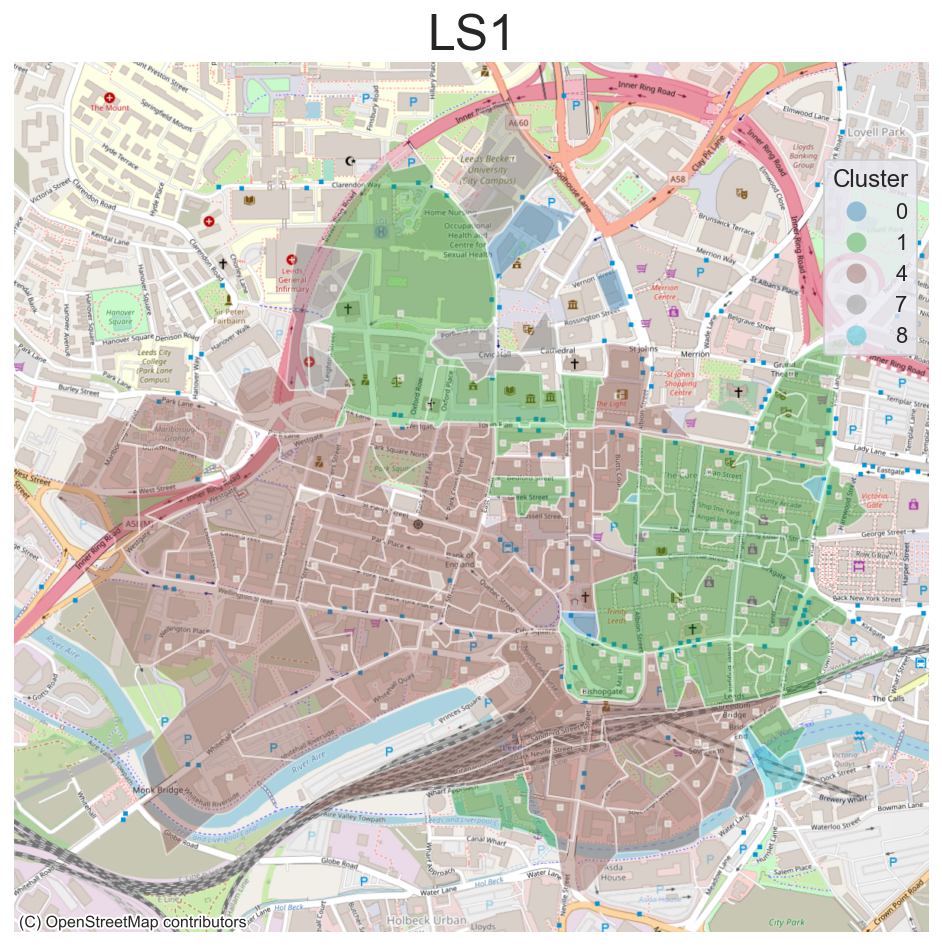

In [44]:
#Mapping clusters in LS1

f,ax = plt.subplots(1, figsize=(16,8))

LS1.plot(column='Cluster2',categorical=True, alpha=0.4, legend=True,ax=ax)

# make axis invisible for subplot 1
ax.set_axis_off()

# Adjust legend location
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.0,0.9))
leg.set_title('Cluster')
ax.set_title('LS1', fontdict= 
            {'fontsize':25})

#add open street map base map
cx.add_basemap(ax, crs=27700, source=cx.providers.OpenStreetMap.Mapnik)


plt.show()

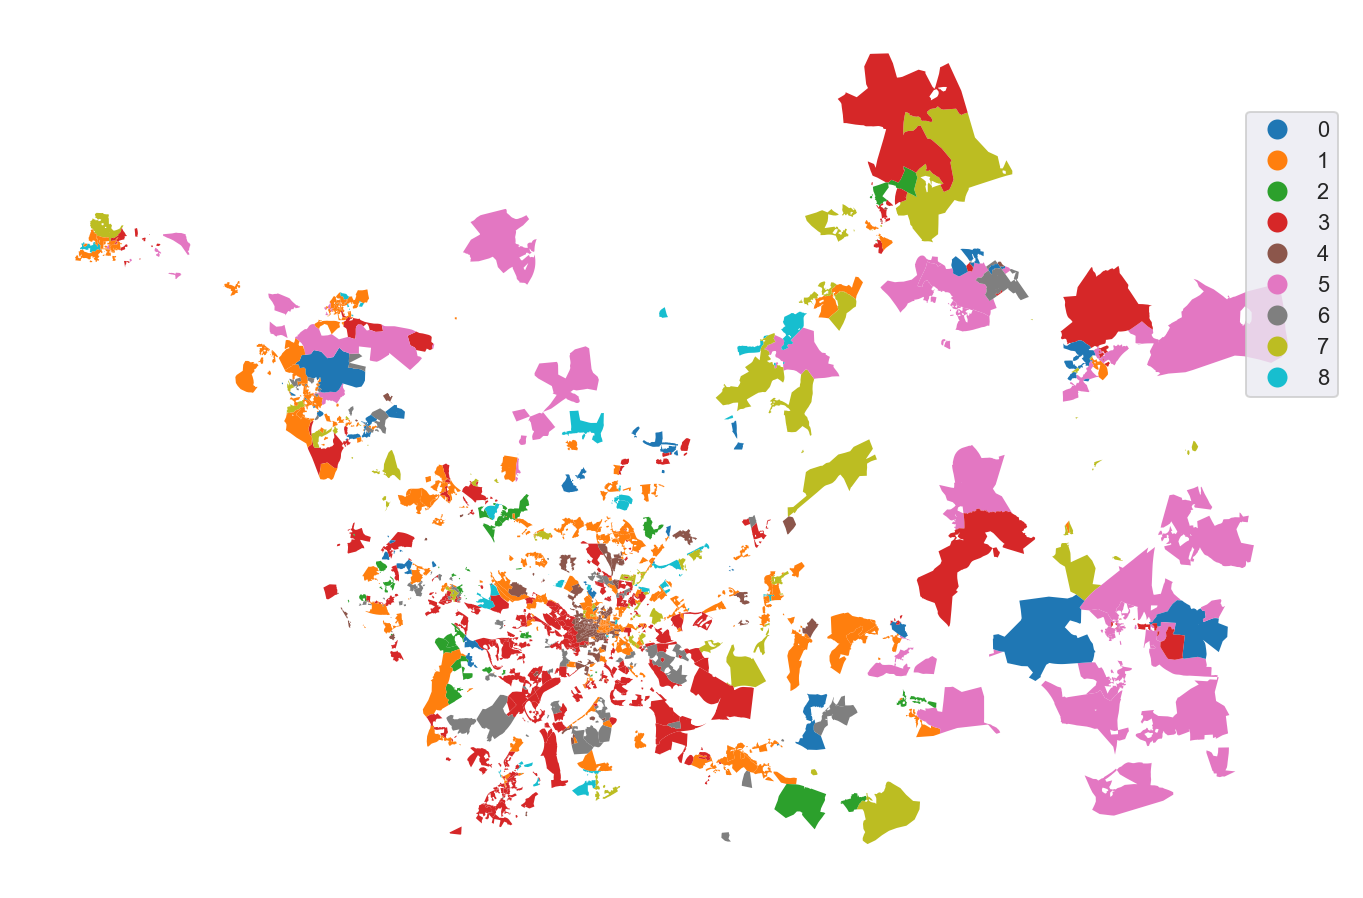

In [51]:
#Mapping clusters in LS
f,ax = plt.subplots(1, figsize=(16,8))

LS.plot(column='Cluster2',categorical=True, legend=True,ax=ax, edgecolor= 'none')

# make axis invisible for subplot 1
ax.set_axis_off()

# Adjust legend location
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.0,0.9))

plt.show()

In [53]:
#Investigate LS
LS.describe()

Agricultur  Industrial  Industri_1  Leisure 4/  Leisure Am  Leisure Bu  \
count    396.0000    396.0000    396.0000    396.0000    396.0000    396.0000   
mean       0.0003      0.2106      0.0367      0.0000      0.0117      0.0002   
std        0.0022      0.2861      0.1178      0.0000      0.0544      0.0016   
min        0.0000      0.0000      0.0000      0.0000      0.0000      0.0000   
25%        0.0000      0.0000      0.0000      0.0000      0.0000      0.0000   
50%        0.0000      0.0240      0.0000      0.0000      0.0000      0.0000   
75%        0.0000      0.4044      0.0000      0.0000      0.0000      0.0000   
max        0.0362      1.0000      0.8467      0.0000      0.7550      0.0206   

       Leisure Ci  Leisure Cu  Leisure Ge  Leisure Pe  ...  diversity  \
count    396.0000    396.0000    396.0000    396.0000  ...   396.0000   
mean       0.0000      0.0069      0.0004      0.0029  ...     0.5575   
std        0.0000      0.0546      0.0034      0.0210  ...     0.2735   
min        0.0000      0.0000      0.0000      0.0000  ...     0.0000   
25%        0.0000      0.0000      0.0000      0.0000  ...     0.3894   
50%        0.0000      0.0000      0.0000      0.0000  ...     0.6383   
75%        0.0000      0.0000      0.0000      0.0000  ...     0.7740   
max        0.0000      0.8699      0.0401      0.2361  ...     0.9754   

       accessibil      Bus     Rail     Road  crime per  Clusters  \
count    396.0000 396.0000 396.0000 396.0000   396.0000  396.0000   
mean       0.0006   0.0000   0.0275   0.0008     0.0080    3.5909   
std        0.0003   0.0001   0.0130   0.0005     0.0183    2.5900   
min        0.0001   0.0000   0.0033   0.0001     0.0000    0.0000   
25%        0.0005   0.0000   0.0203   0.0005     0.0013    1.0000   
50%        0.0007   0.0000   0.0293   0.0007     0.0035    4.0000   
75%        0.0008   0.0000   0.0337   0.0010     0.0081    6.0000   
max        0.0024   0.0017   0.0792   0.0047     0.2809    8.0000   

                        UPP  Cluster2      Total  
count              396.0000  396.0000   396.0000  
mean  1404040404655459.5000    3.2146  2943.2960  
std   1911559464009689.2500    2.2483  5271.9702  
min             363424.0000    0.0000   104.3000  
25%             368689.0000    1.0000   399.6275  
50%             375002.5000    3.0000  1148.2338  
75%   4000000000788843.0000    4.0000  3031.9036  
max   4000000002133880.0000    8.0000 56390.2229  

[8 rows x 35 columns]

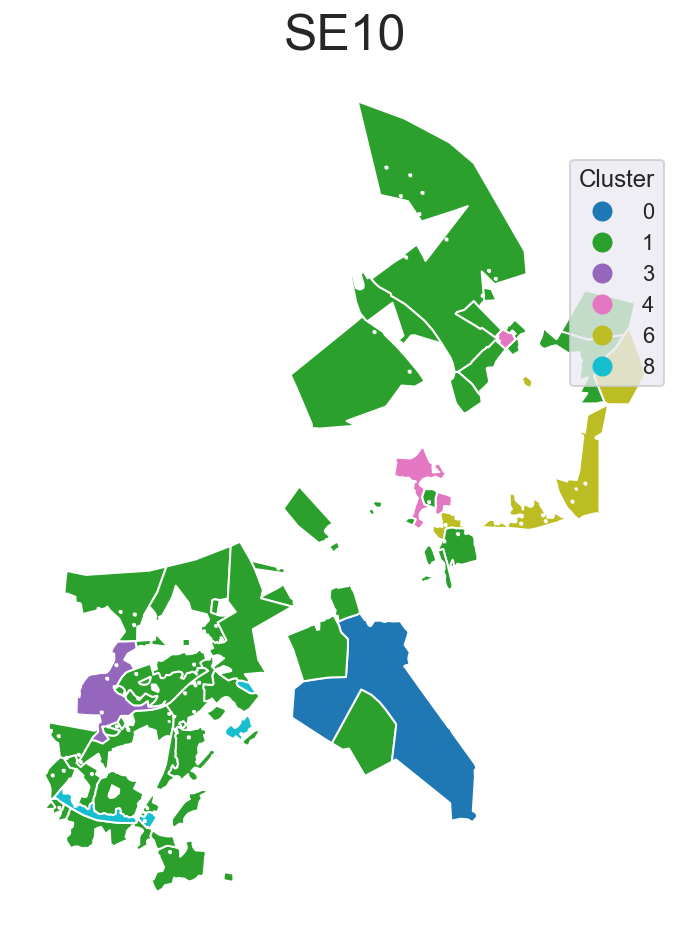

In [99]:
#Mapping clusters in SE10

f,ax = plt.subplots(1, figsize=(16,8))

LS1.plot(column='Cluster2',categorical=True, alpha=0.4, legend=True,ax=ax)

# make axis invisible for subplot 1
ax.set_axis_off()

# Adjust legend location
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.0,0.9))
leg.set_title('Cluster')
ax.set_title('SE10 (Greenwich)', fontdict= 
            {'fontsize':25})

#add open street map base map
cx.add_basemap(ax, crs=27700, source=cx.providers.OpenStreetMap.Mapnik)


plt.show()

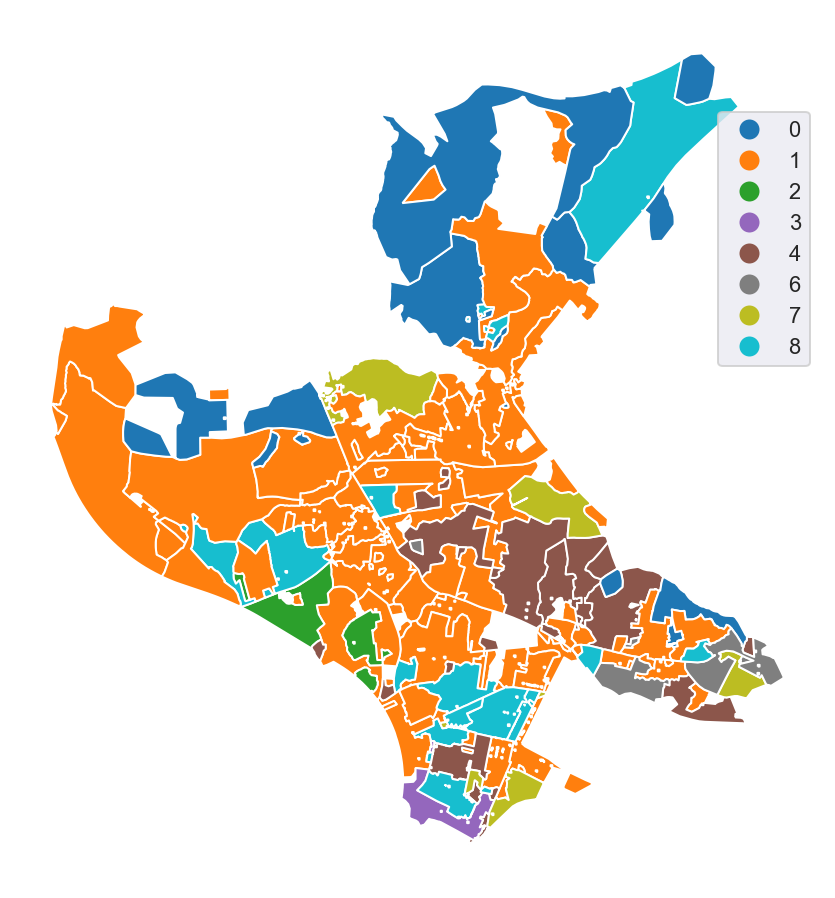

In [121]:
#Mapping clusters in LS6

f,ax = plt.subplots(1, figsize=(16,8))

LS6.plot(column='Cluster2',categorical=True, alpha=0.4, legend=True,ax=ax)

# make axis invisible for subplot 1
ax.set_axis_off()

# Adjust legend location
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.0,0.9))
leg.set_title('Cluster')
ax.set_title('LS6', fontdict= 
            {'fontsize':25})

#add open street map base map
cx.add_basemap(ax, crs=27700, source=cx.providers.OpenStreetMap.Mapnik)


plt.show()

In [3]:
#Mapping clusters in South-East London
f,ax = plt.subplots(1, figsize=(16,8))

SE.plot(column='Cluster2',categorical=True, legend=True,ax=ax, alpha=0.5, edgecolor= 'none')

# make axis invisible for subplot 1
ax.set_axis_off()

# Adjust legend location
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.0,0.9))
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.0,0.9))
leg.set_title('Cluster')
ax.set_title('South-East London', fontdict= 
            {'fontsize':25})

cx.add_basemap(ax, crs=27700, source=cx.providers.OpenStreetMap.Mapnik)


plt.show()

NameError: name 'plt' is not defined

In [2]:
#Mapping clusters in Inner London
f,ax = plt.subplots(1, figsize=(16,8))

Inner London.plot(column='Cluster2',categorical=True, legend=True,ax=ax, alpha=0.5, edgecolor= 'none')

# make axis invisible for subplot 1
ax.set_axis_off()

# Adjust legend location
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.0,0.9))
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.0,0.9))
leg.set_title('Cluster')
ax.set_title('Inner London', fontdict= 
            {'fontsize':25})

cx.add_basemap(ax, crs=27700, source=cx.providers.OpenStreetMap.Mapnik)


plt.show()

NameError: name 'plt' is not defined

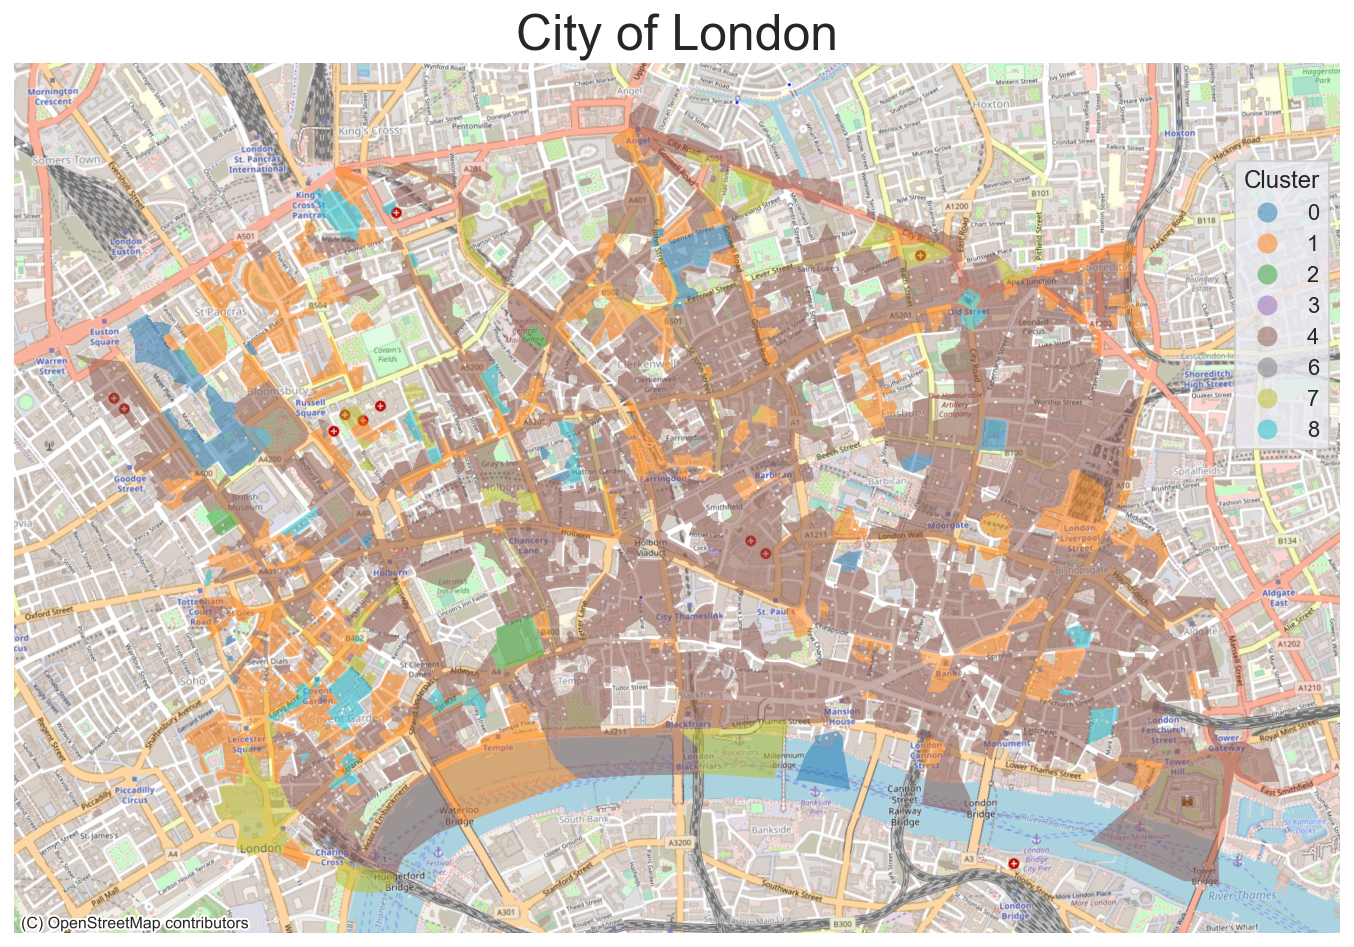

In [46]:
#Mapping clusters in City of London
f,ax = plt.subplots(1, figsize=(16,8))

cbd.plot(column='Cluster2',categorical=True, legend=True,ax=ax, alpha=0.5, edgecolor= 'none')

# make axis invisible for subplot 1
ax.set_axis_off()

# Adjust legend location
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.0,0.9))
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.0,0.9))
leg.set_title('Cluster')
ax.set_title('City of London', fontdict= 
            {'fontsize':25})

cx.add_basemap(ax, crs=27700, source=cx.providers.OpenStreetMap.Mapnik)

plt.show()

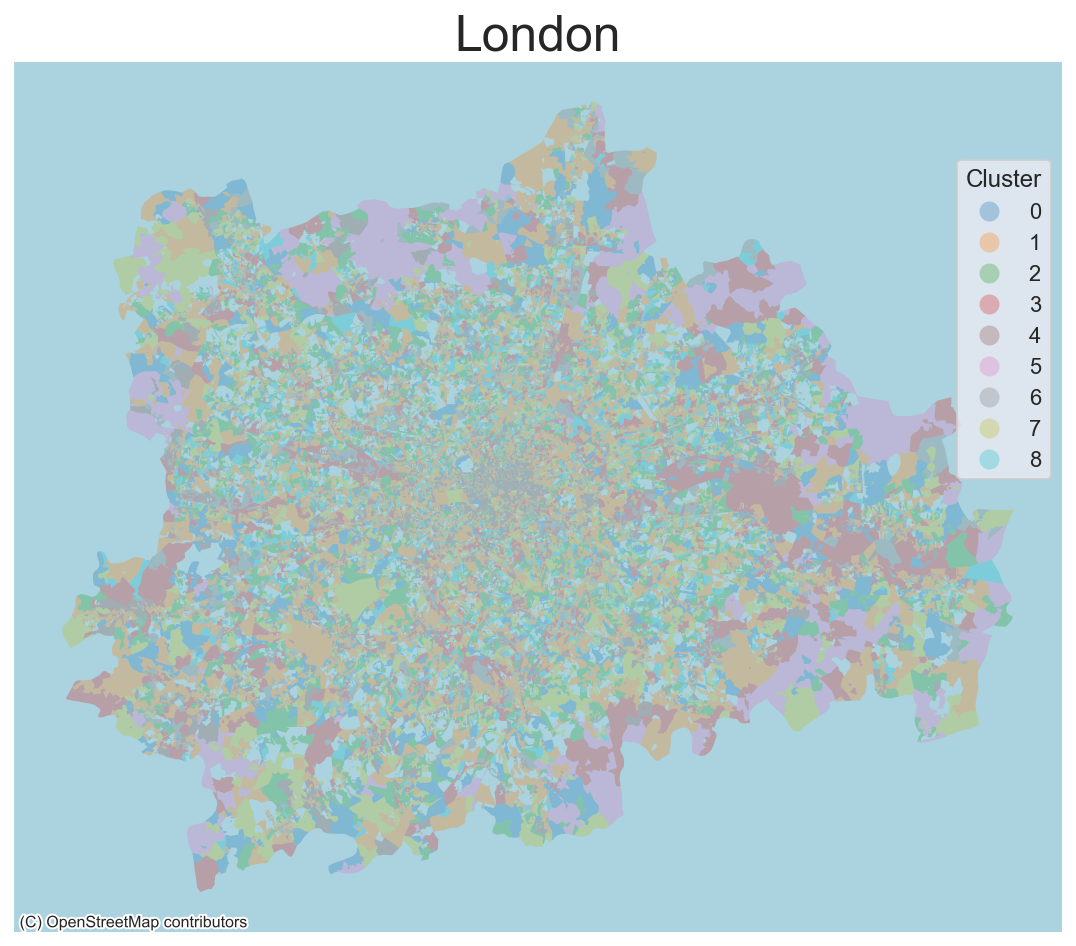

In [61]:
#Mapping clusters in London
f,ax = plt.subplots(1, figsize=(16,8))

london.plot(column='Cluster2',categorical=True, legend=True,ax=ax, alpha=0.3, edgecolor= 'none')

# make axis invisible for subplot 1
ax.set_axis_off()

# Adjust legend location
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.0,0.9))
leg.set_title('Cluster')
ax.set_title('London', fontdict= 
            {'fontsize':25})

cx.add_basemap(ax, crs=london.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)

plt.show()

# Verfication of the classification output using COWZ (Classifications of Workplace Zones)

In [ ]:
#import COWZ data
geofile2  = r'C:\\Users\\medshesa\\Documents\\Whytehawk Project\\Whytehawk data\\Workplace_Zones_(December_2011)_Population_Weighted_Centroids\\Workplace_Zones_(December_2011)_Population_Weighted_Centroids.shp'
COWZ = gpd.read_file(geofile2)

In [ ]:

Whytehawk_and_COWZ = gpd.sjoin(df1, COWZ, how="inner", op='intersects')

In [ ]:
#Convert to workplace type
Whytehawk_and_COWZ['Workplace_type'] = Whytehawk_and_COWZ['wz11cd'].str[:1]

In [ ]:
Whytehawk_and_COWZ['Workplace_type'].unique()

In [ ]:
#read in full COWZ data
COWZ_full = pd.read_csv('C:\\Users\\medshesa\\Documents\\Whytehawk Project\\Whytehawk data\\wzassignmentsfinal.csv')

In [ ]:
#remove Nans
COWZ_full.dropna(axis=0, how='any')

In [ ]:
#join COWZ to whythawk data
Whytehawk_and_COWZ_full = Whytehawk_and_COWZ.merge(COWZ_full, left_on='wz11cd', right_on='Workplace Zone Code')

In [ ]:
#view supergroups 
Whytehawk_and_COWZ_full['Supergroup Name'].unique()
Whytehawk_and_COWZ_full.loc[Whytehawk_and_COWZ_full['Supergroup Name'] == 'Retail']

In [ ]:
#Filter groups
Verification = Whytehawk_and_COWZ_full.filter(['Clusters', 'Supergroup Name'], axis=1)
#convert datatype
Verification['Supergroup Name'] = Verification['Supergroup Name'].astype(str)
Verification['Clusters'] = Verification['Clusters'].astype(int)

In [ ]:
#obtain count
ver_counts = Verification.groupby(['Clusters', 'Supergroup Name']).size()
ver_counts = ver_counts.reset_index(name = 'count')

In [ ]:
#change label names
ver_counts['Cluster'] = ver_counts['Clusters'].map({0: '0: As yet untitled', 1: '1: Urban mixed commercial land use (Retail focused)', 2: '2: Public services', 3: '3: Diverse Industrial and warehousing areas', 4: '4: Urban office spaces', 5: '5: Less urbanised mixed commercial land use (warehousing, retail and leisure spaces)', 6: '6: Low diversity Industrial areas', 7: '7: More urbanised and diverse Public services', 8: '8: High Street Retail'})
#pivot table to creat df of count comparison
ver_counts = ver_counts.pivot(index = 'Cluster', columns = 'Supergroup Name', values = 'count')
#calculate percentages
ver_percent = ver_counts.div(ver_counts.sum(axis=1), axis=0)

In [ ]:
#produce heatmap comparison
ax = sns.heatmap(ver_percent)